# DAT257x: Reinforcement Learning Explained

## Lab 5: Temporal Difference Learning

### Exercise 5.4: Q-Learning Agent

In [10]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 
    
from lib.envs.simple_rooms import SimpleRoomsEnv
from lib.envs.windy_gridworld import WindyGridworldEnv
from lib.envs.cliff_walking import CliffWalkingEnv
from lib.simulation import Experiment

In [11]:
class Agent(object):  
        
    def __init__(self, actions):
        self.actions = actions
        self.num_actions = len(actions)

    def act(self, state):
        raise NotImplementedError

In [37]:
class QLearningAgent(Agent):
    
    def __init__(self, actions, epsilon=0.01, alpha=0.5, gamma=1):
        super(QLearningAgent, self).__init__(actions)
        
        ## TODO 1
        ## Initialize empty dictionary here
        self.Q = {}
        for a in self.actions:
            #self.Q[('0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.01.0',a)] = 0 # SimpleRoomsEnv
            #self.Q[((3,11),a)] = 0 # CliffWalkingEnv
            self.Q[((3, 7),a)] = 0 # WindyGridworldEnv
        
        ## In addition, initialize the value of epsilon, alpha and gamma
        self.epsilon = epsilon
        self.alpha = alpha
        self.gamma = gamma

    def stateToString(self, state):
        mystring = ""
        if np.isscalar(state):
            mystring = str(state)
        else:
            for digit in state:
                mystring += str(digit)
        return mystring    
    
    def act(self, state):
        stateStr = self.stateToString(state)      
        action = np.random.randint(0, self.num_actions) 
        
        ## TODO 2
        ## Implement epsilon greedy policy here
        state_set = set([k[0] for k in agent.Q.keys()])
        if stateStr not in state_set:
            for a in self.actions:
                self.Q[(stateStr,a)] = 0
        
        if self.epsilon == 0:
            choice = 0
        elif self.epsilon == 1:
            choice = 1
        else:
            choice = np.random.binomial(1, self.epsilon)
            
        if choice != 1:    
            action_dict = {}
            for key,value in self.Q.items():
                if key[0]==stateStr:
                    action_dict[key[1]] = value
            highest=max(action_dict.values())  
            actions = [a for a,v in action_dict.items() if v == highest]
            # If multiple max chose random
            action = np.random.choice(actions)
        
        return action
    
    def learn(self, state1, action1, reward, state2, done):
        state1Str = self.stateToString(state1)
        state2Str = self.stateToString(state2)
        
        ## TODO 3
        ## Implement the q-learning update here
        #print(state2Str)
        #print(self.actions)
        #print([self.Q[(state2Str, a)] for a in self.actions])
        state_set = set([k[0] for k in agent.Q.keys()])
        if state2Str in state_set:
            Qmax = max([self.Q[(state2Str, a)] for a in self.actions])
        else:
            Qmax = 0
        td_target = reward + self.gamma*Qmax
        self.Q[(state1Str, action1)] += self.alpha*(td_target - self.Q[(state1Str, action1)])
        """
        Q-learning Update:
        Q(s,a) <- Q(s,a) + alpha * (reward + gamma * max(Q(s') - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * (td_target - Q(s,a))
        or
        Q(s,a) <- Q(s,a) + alpha * td_delta
        """

<IPython.core.display.Javascript object>


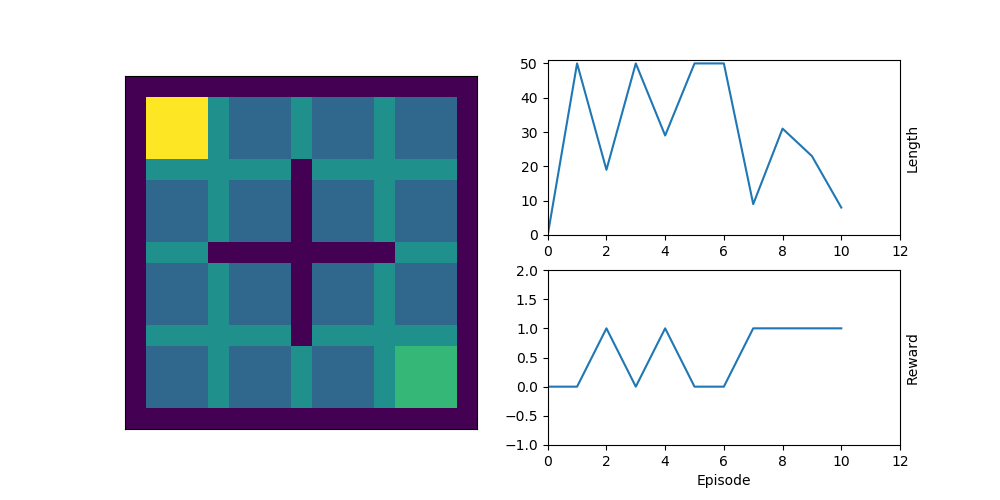

In [21]:
interactive = True
%matplotlib nbagg
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

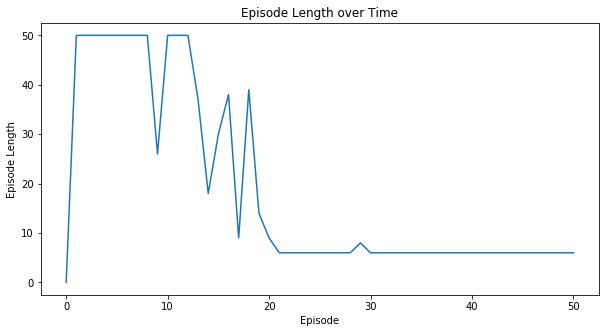

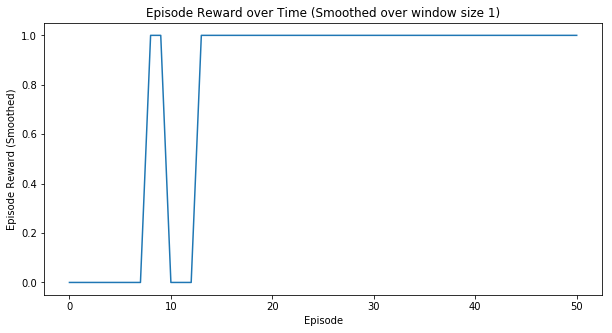

In [27]:
interactive = False
%matplotlib inline
env = SimpleRoomsEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)

<IPython.core.display.Javascript object>


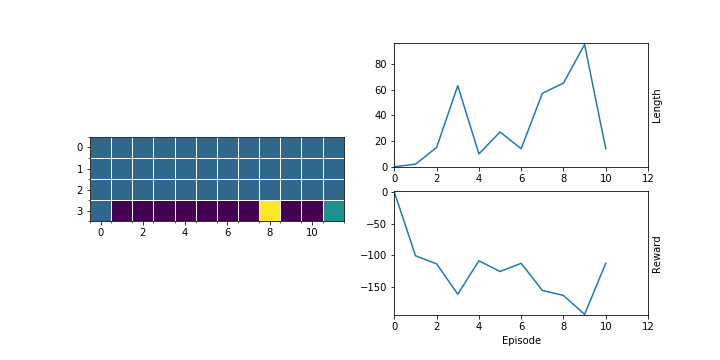

<IPython.core.display.Javascript object>


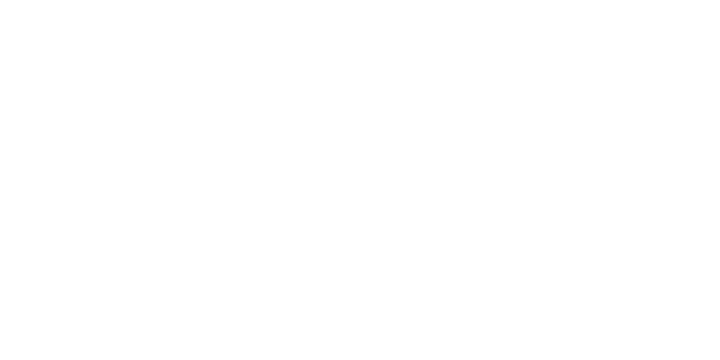

In [31]:
interactive = True
%matplotlib nbagg
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(10, interactive)

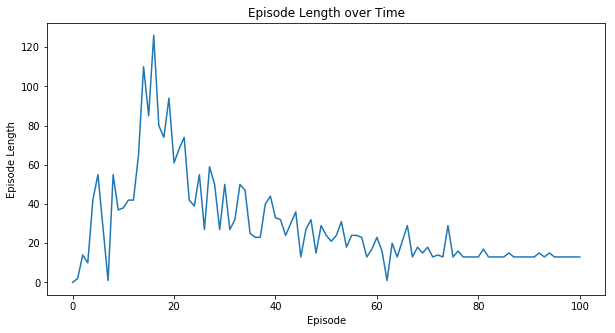

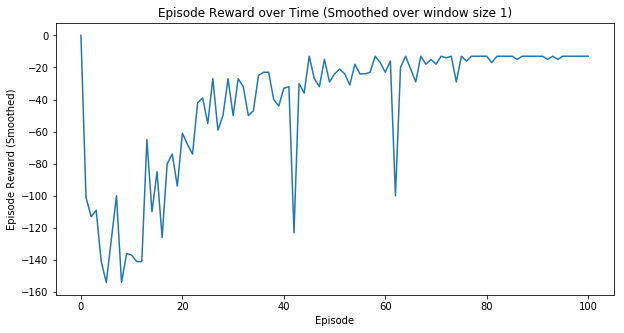

In [36]:
interactive = False
%matplotlib inline
env = CliffWalkingEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(100, interactive)

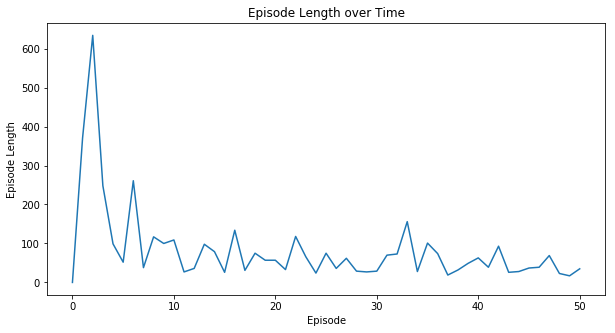

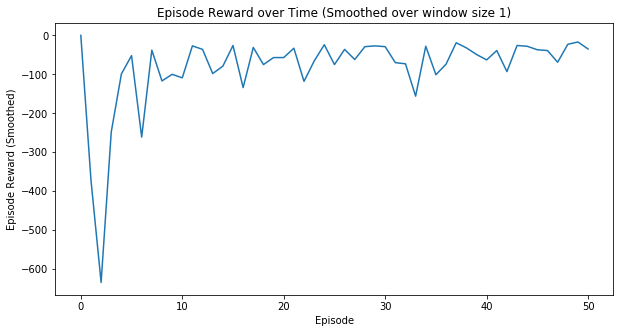

In [40]:
interactive = False
%matplotlib inline
env = WindyGridworldEnv()
agent = QLearningAgent(range(env.action_space.n))
experiment = Experiment(env, agent)
experiment.run_qlearning(50, interactive)